# Data sets
For the first part of the project you will work on a high-dimensional cancer data set (3000 genes) with relatively few observations (82). There are three types of cancer in the data set and the labels are provided in the first column on the data matrix (posted on Canvas).

For the second part of the project you will work on the other high-dimensional cancer data set (TCGA) from class. This data set has far more samples spread over 6 classes. Some of you will also revisit the cats and dogs data set from project 2.

# Question 1
Investigate at least 4 different clustering methods on the "CancerData.txt" data set. **density based, gaussian mixtures,k-means, spectral **

Consider different dimension and feature selection techniques. Remember - it's a clustering task so you cannot select based on the class label!!!

Questions to focus on:

* Do the detected clusters overlap with the classes? Do some classes stand out? **jämför cluster och faktiska labels i 2d pca/tSNE?**
* Do cluster selection methods (try at least 2) propose 3 clusters or more/fewer? **elbow för k-means,sigma for gaussian**
* How sensitive are any of the results above to how many features or reduced dimensions you use? and does this depend on which clustering method you use? **experiment design, skriva skript som kan generera resultat, jämför med olika nivåer av reduktion från igen reduktion, använda bilder som resultat**
* How stable are the clustering results (investigate via resampling, consensus clustering etc)? **generera resultat för alla metoder**

to do: 

1.skapa funktioner för varje metod.
2. Undersöka cluster overlap för varje metod, generera resultat
3.skapa funktion som kan undersöka och generera resultat för olika nivåer av PCA/feature selection
4.Undersöka cluster selection
5.undersök stabilitet


# Question 2
For the second task you will work on the TCGA data set which is high-dimensional but far richer in terms of the number of samples. The first themes all relate to a "complication". Your job is to investigate how these complications impact the clustering performance of the different methods. So try to say something about the overall impact on clustering in general and, if you see a varying impact on performance for different methods discuss this and try to reason as to why. The last theme is about clustering features and you will revisit the cats and dogs data set for this.



## Theme 2b - relative cluster size
The classes in the TCGA data set are already imbalanced. Use this data as a basis for a simulation study where you investigate the imbalance in cluster size (in terms of number of observations) on clustering and the selection of the number of clusters.

You can even out this data set or make it even more imbalanced by removing observations or adding pseudo-observations (by creating new observations by e.g. taking a linear combination of 2 observations within the same class weighted by e.g. 0.85, 0.15 say).

How do the clustering methods and cluster selection methods handle imbalanced cluster sizes? Think carefully about how to go about this simulation study so you don't confound cluster separation and cluster size too much. It's up to you which classes you choose to make small or large and what challenges you choose to focus on.

Useful links? 
* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
* 

# Question 1

## Data loading and preprocessing 

In [136]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
# There are three types of cancer in the data set and the labels are provided in the first column on the data matrix (posted on Canvas).

cancerData = pd.read_csv('./Cancerdata.txt', sep='\t') # Labels (first col) and features
columnIndexing = ['gene'+str(int(i)) for i in range(cancerData.shape[1])]
columnIndexing[0] = 'label' # first column is the labels

print("Number of column names", len(columnIndexing))
print("Number of columns in the dataset", cancerData.shape[1])
print("Shape of dataset", np.shape(cancerData))
print("Example cell element", cancerData.loc[1][2])
cancerData.set_axis(columnIndexing, axis="columns", inplace=True)
print("Example row:")
print(cancerData.loc[1])
print("Example column:")
print(cancerData['gene1'])

Number of column names 3000
Number of columns in the dataset 3000
Shape of dataset (82, 3000)
Example cell element -0.509770195
Example row:
label       1.000000
gene1      -1.227567
gene2      -0.509770
gene3      -1.227567
gene4      -0.722172
              ...   
gene2995   -1.227567
gene2996    0.694120
gene2997    2.981591
gene2998    0.346862
gene2999    0.163492
Name: 1, Length: 3000, dtype: float64
Example column:
1    -1.227567
2    -1.120330
3    -1.330720
4    -1.510219
5     0.230166
        ...   
78   -1.150510
79   -0.584720
80   -1.424392
81    0.080706
82   -1.385728
Name: gene1, Length: 82, dtype: float64


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\2610169664.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cancerData.set_axis(columnIndexing, axis="columns", inplace=True)


In [137]:
cancerData.head()

,label,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,...,gene2990,gene2991,gene2992,gene2993,gene2994,gene2995,gene2996,gene2997,gene2998,gene2999
1,1,-1.227567,-0.509770,-1.227567,-0.722172,0.132458,2.295282,1.899027,1.877939,3.375826,...,2.387587,0.940752,-0.943628,-0.606625,-1.227567,-1.227567,0.694120,2.981591,0.346862,0.163492
2,0,-1.120330,-1.120330,-0.839468,-0.594322,-0.016176,-0.095270,-1.120330,0.016662,3.750095,...,2.321014,0.979683,-0.961493,-1.120330,-1.120330,-1.120330,-0.705967,2.008537,0.358654,0.737431
3,1,-1.330720,-1.235862,-1.330720,-0.853254,1.020889,1.111245,0.763962,1.544266,3.334633,...,2.055475,0.682382,-0.879855,-0.852728,-1.330720,-1.330720,0.690879,1.697196,0.506439,-0.390086
4,0,-1.510219,-1.052041,-1.510219,-0.695578,0.237352,-1.510219,-1.510219,-1.510219,2.732156,...,1.659447,1.153967,-0.701910,-0.383355,-1.510219,-1.510219,-0.499640,1.697227,1.325028,0.704106
5,2,0.230166,-0.095223,-0.990862,-0.990862,-0.186215,-0.990862,-0.990862,-0.990862,3.408664,...,2.316889,0.748838,-0.990862,-0.990862,-0.990862,-0.990862,0.261389,3.408664,-0.990862,-0.990862


## PCA and TSNE on the data

Shape of dataset excluding labels (82, 2999)
Shape of labels (82,)
Shape of PCA results (82, 3)
Explained variation per principal component: [0.12563841 0.09442987 0.07225259]
[t-SNE] Computing 81 nearest neighbors...
[t-SNE] Indexed 82 samples in 0.005s...
[t-SNE] Computed neighbors for 82 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 16.391681


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\2740754799.py:33: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.109276
[t-SNE] KL divergence after 300 iterations: 0.278190


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\2740754799.py:52: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


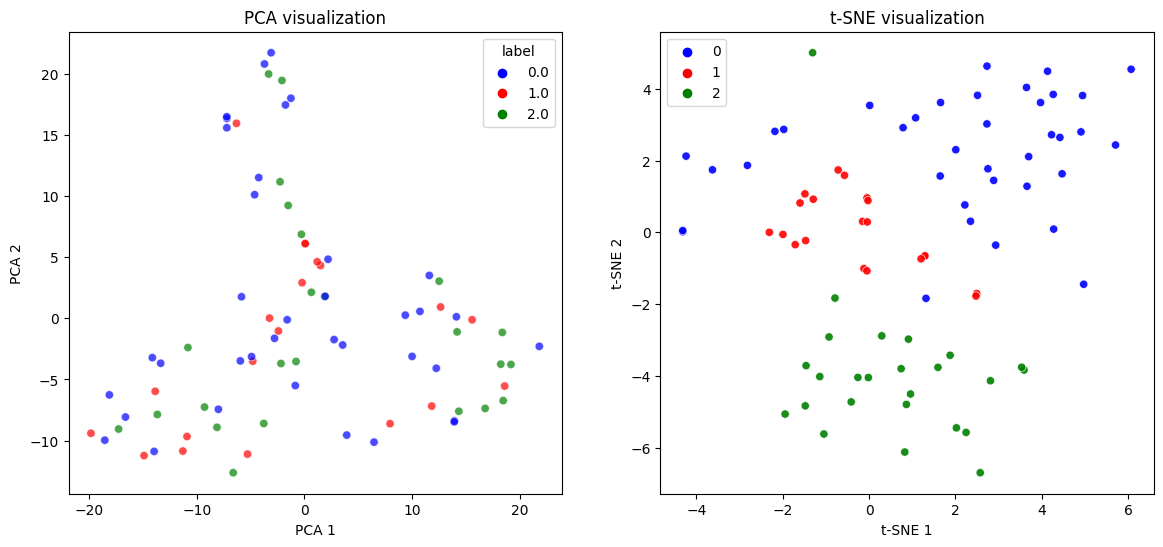

In [138]:
# t-SNE visualization of the cancerData
# Skeleton code mostly from this link https://builtin.com/data-science/tsne-python
# PCA pretreatment due to high num of variables
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import to_hex

# PCA with plotting
cancerLabels = cancerData.iloc[:,0] # Labels for the data
cancerDataSubset = cancerData.iloc[:,1:] # Remove the labels

print("Shape of dataset excluding labels", np.shape(cancerDataSubset))
print("Shape of labels", np.shape(cancerLabels))

n_pca_components = 3
pca = PCA(n_components=n_pca_components)
column_names_pca = ['PCA '+str(i) for i in range(1,n_pca_components+1)]
pca_results = pd.DataFrame(pca.fit_transform(cancerDataSubset), columns=column_names_pca)
print("Shape of PCA results", np.shape(pca_results))

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple',
          'pink', 'brown', 'black', 'magenta', 'cyan']
colors_hex = [to_hex(i) for i in colors]
color_palette = sns.color_palette(colors_hex)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(
    x='PCA 1', y='PCA 2',
    hue=cancerLabels,
    palette=color_palette,
    data=pca_results,
    legend="full",
    alpha=0.7
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA visualization")

# t-SNE plotting 
n_tsne_components = 2
tsne = TSNE(n_components=n_tsne_components, verbose=1, perplexity=40, n_iter=300)
column_names_tsne = ['t-SNE '+str(i) for i in range(1,n_tsne_components+1)]
tsne_results = pd.DataFrame(tsne.fit_transform(cancerDataSubset), columns=column_names_tsne)

plt.subplot(1,2,2)
sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue=cancerLabels.values,
    palette=color_palette,
    data=tsne_results,
    legend="full",
    alpha=0.9
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE visualization")
plt.show()

### Plot only the t-SNE visualisation for presentation

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\1382335704.py:3: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


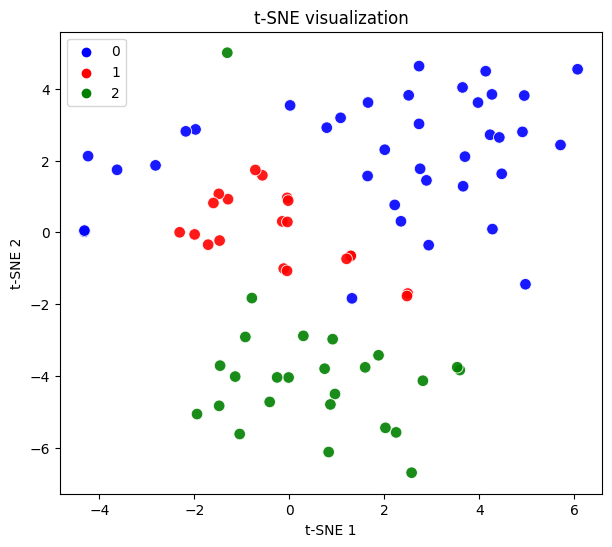

In [139]:
plt.figure(figsize=(7,6))

sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue=cancerLabels.values,
    palette=color_palette,
    data=tsne_results,
    s=70,
    legend="full",
    alpha=0.9
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE visualization")
plt.savefig('t-SNE_visualization.png', dpi=300)
plt.show()

### Define plotting functions

In [140]:
# Define function to compare clustering results with the true labels
def compare_results(cluster_labels, method_name:str):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("labels from "+method_name+" clustering")
    
    plt.subplot(1,2,2)
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cancerLabels.values,
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("true labels")
    
    plt.show()

# define function to plot and save only the clustering results, for presentation
def plot_clustering_results(cluster_labels, method_name:str):
    plt.figure(figsize=(7,6))
    
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("labels from "+method_name+" clustering")
    
    plt.savefig("./"+method_name+"_clustering.png", dpi=300)
    plt.show()

## Clustering methods and functions

### Clustering Method 1) Density based clustering

In [141]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import to_hex

def generate_DBSCAN_clusters(pca_level):

    n_pca_components = pca_level
    pca_DBSCAN = PCA(n_components=n_pca_components)
    column_names_pca = ['PCA '+str(i) for i in range(1,n_pca_components+1)]

    pca_results_DBSCAN = pca_DBSCAN.fit_transform(cancerDataSubset)

    if n_pca_components < 15:
        min_samples = 3*3
    elif n_pca_components < 40:
        min_samples = 2*3
    else:
        min_samples = 3
        
    print("min_samples:", min_samples)

    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(pca_results_DBSCAN)
    neigh_dist, _ = neigh.kneighbors(n_neighbors=min_samples, return_distance=True)
    eps = np.max(neigh_dist[:,-1])/2 # SAVED

    if min_samples == 3:
        print(f"Max distance to {min_samples}rd nearest neighbor (eps): {eps:.2f}")
    else:
        print(f"Max distance to {min_samples}th nearest neighbor (eps): {eps:.2f}")

    DB_pca_cluster = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_results_DBSCAN)
    cluster_labels = DB_pca_cluster.labels_
    
    return cluster_labels

#### Explore DBSCAN parameters

min_samples: 9
Max distance to 9th nearest neighbor (eps): 7.62
Contains noise: True
Number of noise observations: 24
Number of cluster_labels: 3


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\3982191447.py:48: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  ax2 = sns.scatterplot(


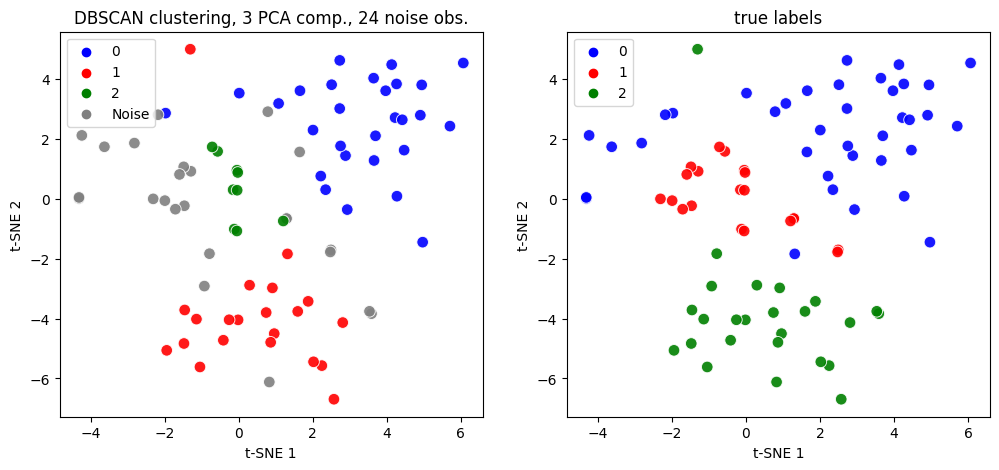

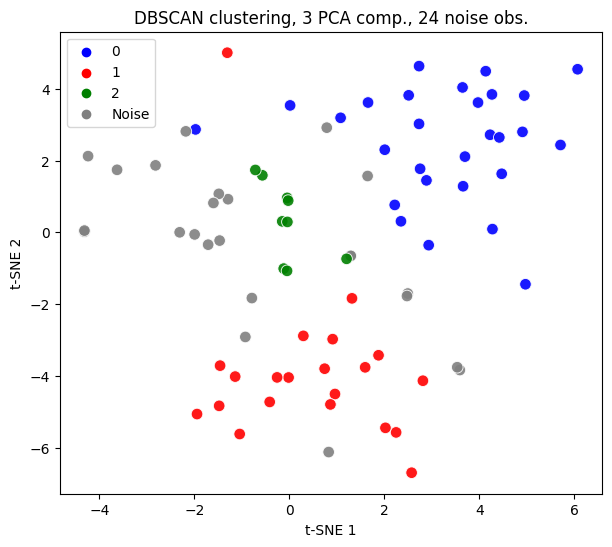

In [142]:
cluster_labels = generate_DBSCAN_clusters(pca_level=3)

contains_noise = any(cluster_labels==-1)
if contains_noise:
    cluster_labels[cluster_labels==-1] = 50 # Make outliers a separate cluster

print(f"Contains noise: {contains_noise}")
num_noise = np.sum(cluster_labels==50)
print(f"Number of noise observations: {num_noise}")

colors_all = ['blue', 'red', 'green', 'orange', 'purple',
          'pink', 'brown', 'black', 'magenta', 'cyan']

num_clusters = len(np.unique(cluster_labels))-1
print("Number of cluster_labels:", num_clusters)
colors = colors_all[:max(len(np.unique(cluster_labels))-1, np.unique(cancerLabels).shape[0])] # Make sure we have enough colors
if contains_noise:
    colors.append('grey')  

colors_hex = [to_hex(i) for i in colors]

if num_clusters < 3:
    colors_hex = colors_hex[:num_clusters]
    colors_hex.append(to_hex('grey'))

fig = plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=cluster_labels,
    palette=colors_hex,
    data=tsne_results,
    s=70,
    legend="full",
    alpha=0.9
)
plt.title(f"DBSCAN clustering, {n_pca_components} PCA comp., {num_noise} noise obs.")
handles, _ = ax1.get_legend_handles_labels()

labels = [str(i) for i in np.unique(cluster_labels)]
if contains_noise:
    labels[labels.index('50')] = 'Noise'
    
ax1.legend(handles, labels, loc='best')

plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=cancerLabels.values,
    palette=color_palette,
    data=tsne_results,
    s=70,
    legend="full",
    alpha=0.9
)

handles, labels =  ax2.get_legend_handles_labels()
labels = [int(float(i)) for i in labels]
ax2.legend(handles, labels, loc='best')
plt.title("true labels")
plt.show()

# plot only clustering results
plt.figure(figsize=(7,6))

ax = sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=colors_hex,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"DBSCAN clustering, {n_pca_components} PCA comp., {num_noise} noise obs.")

handles, _ = ax.get_legend_handles_labels()

labels = [str(i) for i in np.unique(cluster_labels)]
if contains_noise:
    labels[labels.index('50')] = 'Noise'

ax.legend(handles, labels, loc='best')

plt.savefig("./DBSCAN_clustering.png", dpi=300)
plt.show()

#### Automatically generate subplot of all PCA levels

min_samples: 9
Max distance to 9th nearest neighbor (eps): 7.62
min_samples: 9
Max distance to 9th nearest neighbor (eps): 17.41
min_samples: 6
Max distance to 6th nearest neighbor (eps): 19.30
min_samples: 6
Max distance to 6th nearest neighbor (eps): 20.45
min_samples: 3
Max distance to 3rd nearest neighbor (eps): 21.15
min_samples: 3
Max distance to 3rd nearest neighbor (eps): 21.48
min_samples: 3
Max distance to 3rd nearest neighbor (eps): 22.36
Number of PCA components: 3
Number of noise observations: 24
Number of cluster_labels: 3
Number of PCA components: 10
Number of noise observations: 29
Number of cluster_labels: 3
Number of PCA components: 15
Number of noise observations: 30
Number of cluster_labels: 3


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\577442329.py:19: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  ax = sns.scatterplot(


Number of PCA components: 25
Number of noise observations: 59
Number of cluster_labels: 3
Number of PCA components: 40
Number of noise observations: 58
Number of cluster_labels: 6
Number of PCA components: 50
Number of noise observations: 72
Number of cluster_labels: 3
Number of PCA components: 70
Number of noise observations: 76
Number of cluster_labels: 2


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\577442329.py:54: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.scatterplot(


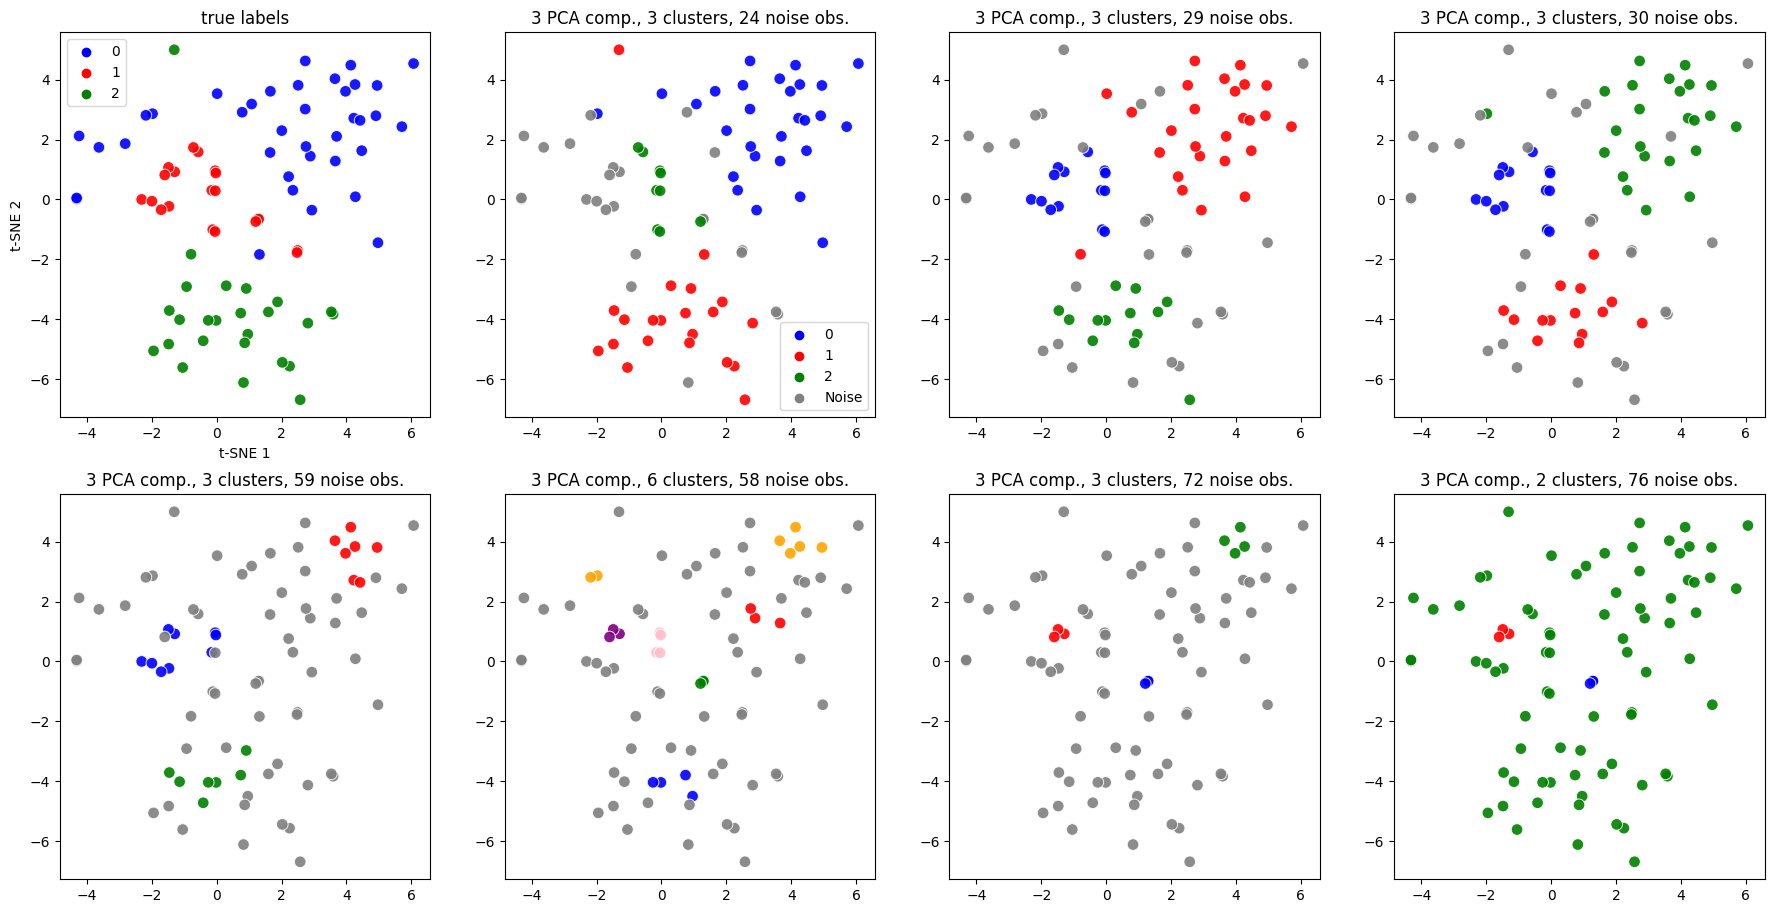

In [143]:

def generate_DBSCAN_results(pca_levels):
    cluster_labels_list = []
    for level in pca_levels:
        cluster_labels = generate_DBSCAN_clusters(pca_level=level)
        
        cluster_labels_list.append(cluster_labels)
        
    return cluster_labels_list

pca_levels = [3, 10, 15, 25, 40, 50, 70]
cluster_labels_list = generate_DBSCAN_results(pca_levels)
    
def generate_DBSCAN_plots(pca_levels, cluster_labels_list):
    
    plt.figure(figsize=(22,11))
    for j in range(len(pca_levels)+1):
        plt.subplot(2, 4, j+1)
        if j == 0:
            ax = sns.scatterplot(
                x="t-SNE 1", y="t-SNE 2",
                hue=cancerLabels.values,
                palette=color_palette,
                data=tsne_results,
                s=70,
                legend="full",
                alpha=0.9
            )
            plt.title("true labels")
            plt.legend(loc='upper left')
        else:
            print(f"Number of PCA components: {pca_levels[j-1]}")
            cluster_labels = cluster_labels_list[j-1]
            
            contains_noise = any(cluster_labels==-1)
            if contains_noise:
                cluster_labels[cluster_labels==-1] = 50 # Make outliers a separate cluster

            num_noise = np.sum(cluster_labels==50)
            print(f"Number of noise observations: {num_noise}")

            colors_all = ['blue', 'red', 'green', 'orange', 'purple',
                    'pink', 'brown', 'black', 'magenta', 'cyan']

            num_clusters = len(np.unique(cluster_labels))-1
            print("Number of cluster_labels:", num_clusters)
            colors = colors_all[:max(len(np.unique(cluster_labels))-1, np.unique(cancerLabels).shape[0])] # Make sure we have enough colors
            if contains_noise:
                colors.append('grey')  

            colors_hex = [to_hex(i) for i in colors]
            
            plt.subplot(2, 4, j+1)
            
            ax = sns.scatterplot(
                x='t-SNE 1', y='t-SNE 2',
                hue=cluster_labels,
                palette=colors_hex,
                data=tsne_results,
                s=70,
                legend="full",
                alpha=0.9
            )
            plt.xlabel("")
            plt.ylabel("")
            plt.title(f"{n_pca_components} PCA comp., {num_clusters} clusters, {num_noise} noise obs.")

            if j == 1:
                handles, _ = ax.get_legend_handles_labels()

                labels = [str(i) for i in np.unique(cluster_labels)]
                if contains_noise:
                    labels[labels.index('50')] = 'Noise'

                ax.legend(handles, labels, loc='best')
            else:
                ax.get_legend().remove()

    plt.show()
    
generate_DBSCAN_plots(pca_levels, cluster_labels_list)
    

### Clustering Method 2) K-Means

In [144]:
#kmeans algorithm, using kmeans++ initialisation and only one run

from sklearn.cluster import KMeans
from sklearn import mixture


def Kmeans(dataset,number_of_cluster):
  kmeans = KMeans(init="k-means++",n_clusters=number_of_cluster, n_init="auto").fit(dataset)
  kmeansfit = KMeans(init="k-means++",n_clusters=number_of_cluster, n_init="auto").fit_predict(dataset)
  return kmeans, kmeansfit

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


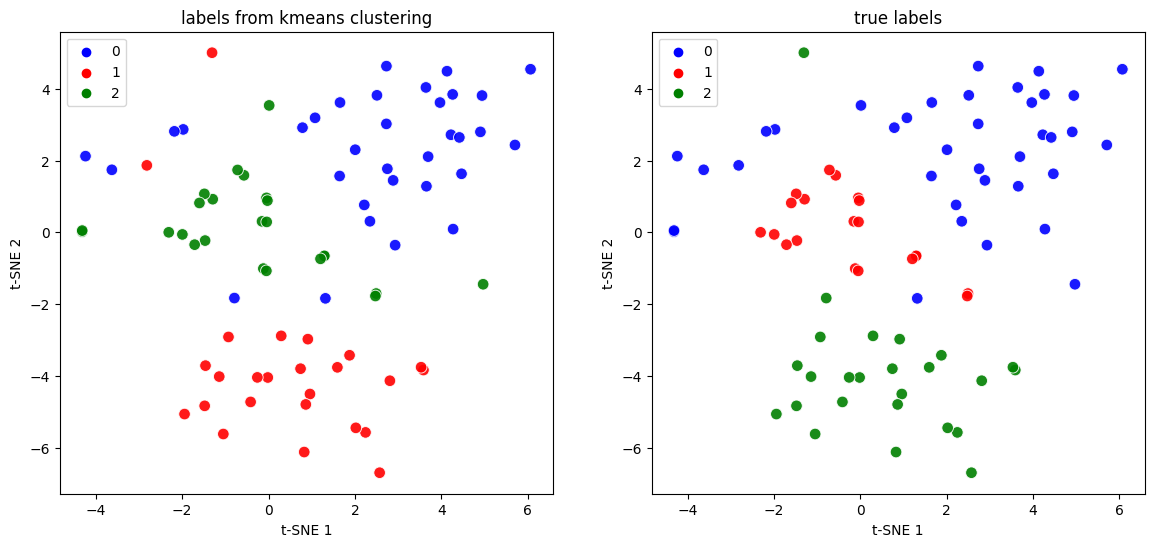

In [145]:
kmeans, kmeansfit = Kmeans(cancerDataSubset,3)

compare_results(kmeansfit,"kmeans")


In [146]:
def elbow(method,dataset):
  if method == "kmeans":
    standard_deviation = []
    means = []
    for i in range(1, 11):
      inertias = []
      for j in range(0,10):
        kmeans = KMeans(n_clusters=i, init='k-means++',n_init=1).fit(dataset)
        inertias.append(kmeans.inertia_)
      means.append(np.mean(inertias))
      standard_deviation.append(np.std(inertias))
    plt.errorbar(range(1,11),means,standard_deviation,fmt='o', marker='s',linestyle="--", capsize=5)
    plt.title("K-Means")
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.plot()
    return means, standard_deviation

  elif method =="gaussianmix":
    elbowplot = []
    for component in range(1,11):
      GMM = mixture.GaussianMixture(n_components=(component))
      GMM = GMM.fit(cancerData)
      score = GMM.score(cancerData)
      print(f"#Score: {score}")
      elbowplot.append(score)
      #plt.title("Gaussian Mixture")
      #plt.xlabel('Number of clusters')
      #plt.ylabel('Log Likelihood')
    #plt.plot(range(1,11),elbowplot)
  else:
    return("method not supported")
  

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\607459149.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1,11),means,standard_deviation,fmt='o', marker='s',linestyle="--", capsize=5)


([70404.69231352373,
  63999.53225531487,
  59388.90053455365,
  55709.06168271731,
  53907.98278061751,
  52199.359635823326,
  50518.94322610467,
  48440.743293716434,
  46955.22387307654,
  45961.614866781434],
 [0.0,
  644.3054626718762,
  1774.8135916588076,
  980.9458263043487,
  896.14992779174,
  982.9231808642571,
  780.312262216218,
  547.9617415505026,
  794.4680795103362,
  913.9870548830584])

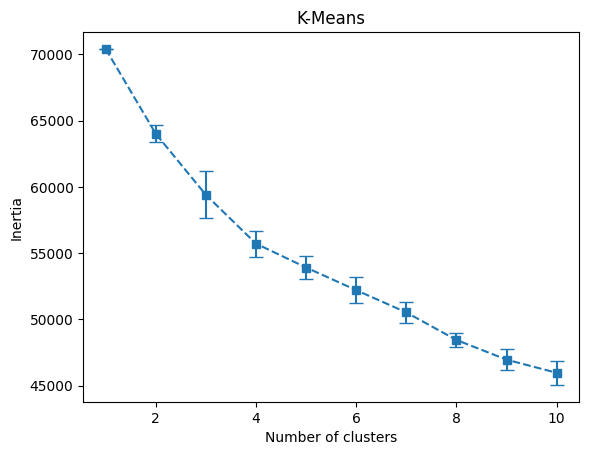

In [147]:
elbow("kmeans",cancerDataSubset)

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\607459149.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1,11),means,standard_deviation,fmt='o', marker='s',linestyle="--", capsize=5)
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\607459149.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1,11),means,standard_deviation,fmt='o', marker='s',linestyle="--", capsize=5)
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\607459149.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(1,11),means,standard_deviation,fmt='o', marker='s',linestyle="--", capsize=5)
C:\Users\Jesper\AppData\L

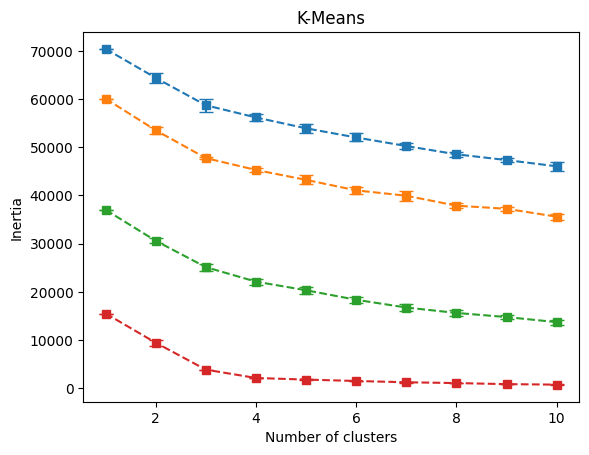

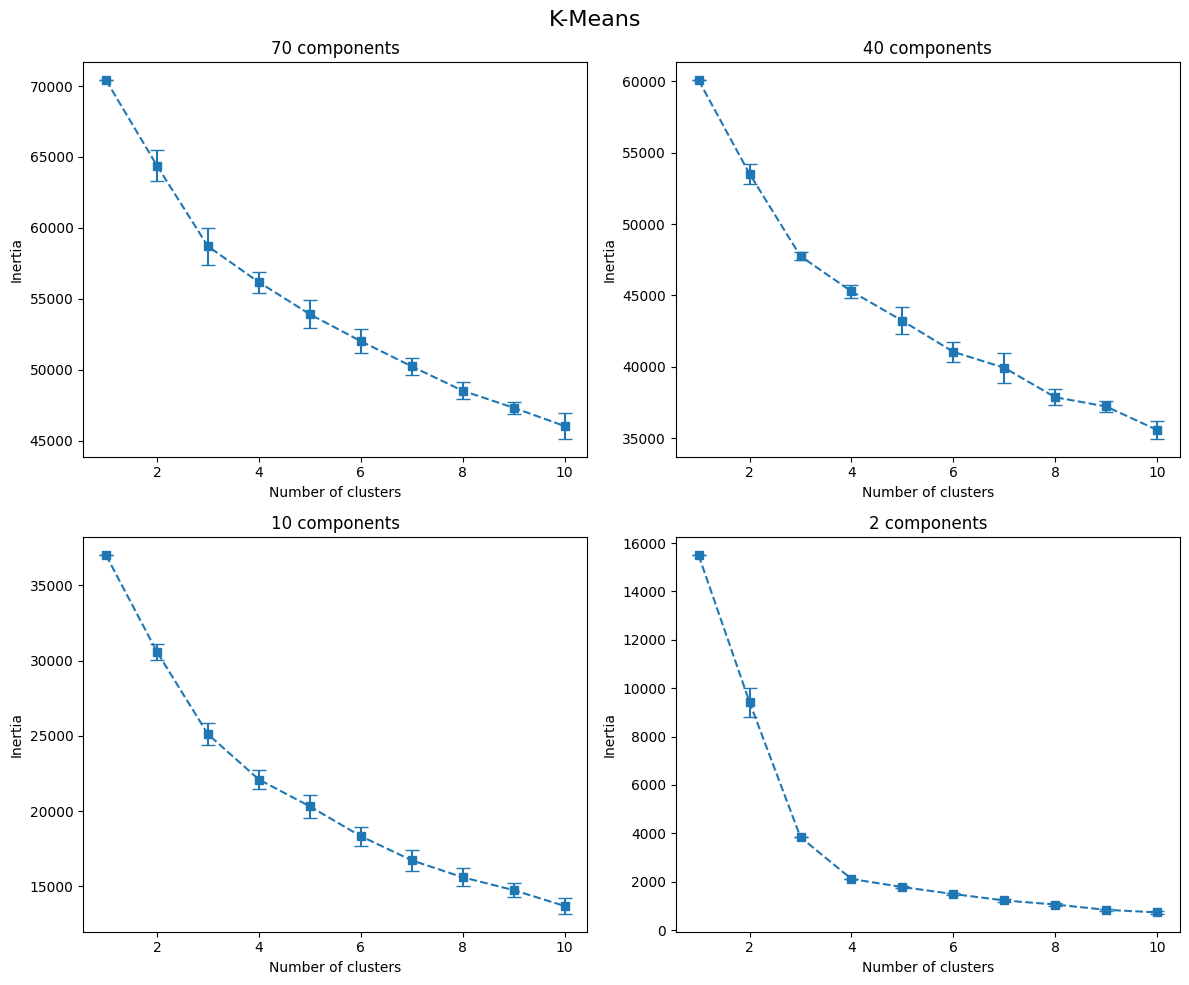

In [148]:

def generate_PCA_kmeans(data):
  standard_deviations = []
  means = []
  PCA_levels = [70, 40, 10,2]
  for level in PCA_levels:
    pca = PCA(n_components=level)
    column_names_pca = ['PCA '+str(i) for i in range(1,level+1)]
    pca_results = pd.DataFrame(pca.fit_transform(data), columns=column_names_pca)
    mean, standard_deviation = elbow("kmeans",pca_results)
    standard_deviations.append(standard_deviation)
    means.append(mean)
 

  import matplotlib.pyplot as plt

  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  axs[0, 0].errorbar(range(1, 11), means[0], standard_deviations[0], label="70 components",fmt='o', marker='s',linestyle="--", capsize=5)
  axs[0, 0].set_title("70 components")
  axs[0, 0].set_xlabel('Number of clusters')
  axs[0, 0].set_ylabel('Inertia')

  axs[0, 1].errorbar(range(1, 11), means[1], standard_deviations[1], label="40 components",fmt='o', marker='s',linestyle="--", capsize=5)
  axs[0, 1].set_title("40 components")
  axs[0, 1].set_xlabel('Number of clusters')
  axs[0, 1].set_ylabel('Inertia')

  axs[1, 0].errorbar(range(1, 11), means[2], standard_deviations[2], label="10 components",fmt='o', marker='s',linestyle="--", capsize=5)
  axs[1, 0].set_title("10 components")
  axs[1, 0].set_xlabel('Number of clusters')
  axs[1, 0].set_ylabel('Inertia')

  axs[1, 1].errorbar(range(1, 11), means[3], standard_deviations[3], label="2 components",fmt='o', marker='s',linestyle="--", capsize=5)
  axs[1, 1].set_title("2 components")
  axs[1, 1].set_xlabel('Number of clusters')
  axs[1, 1].set_ylabel('Inertia')

  fig.suptitle("K-Means", fontsize=16)

  plt.tight_layout()
  plt.show()


generate_PCA_kmeans(cancerDataSubset)






C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


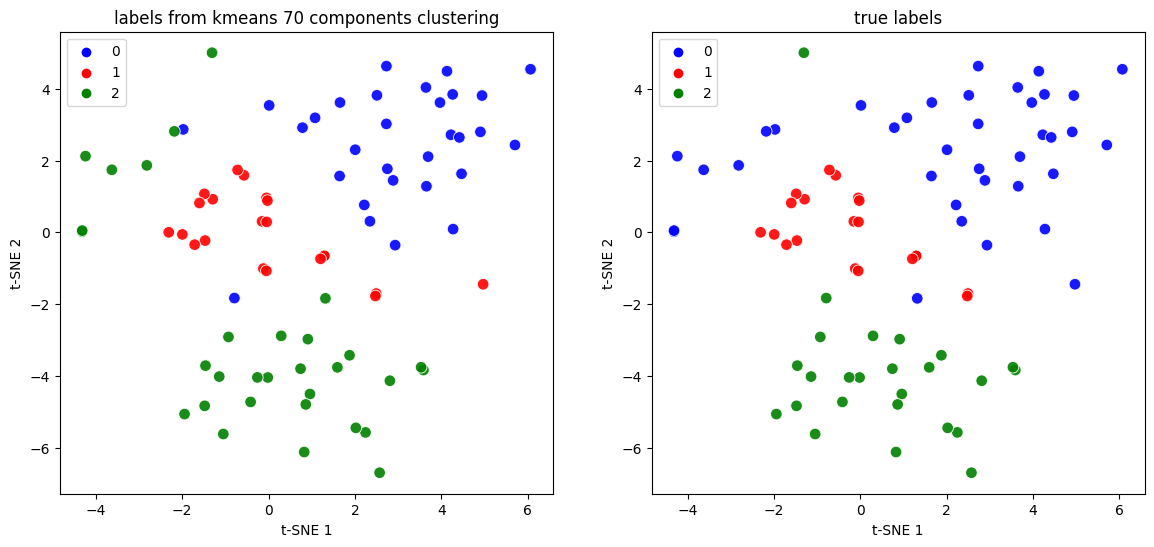

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


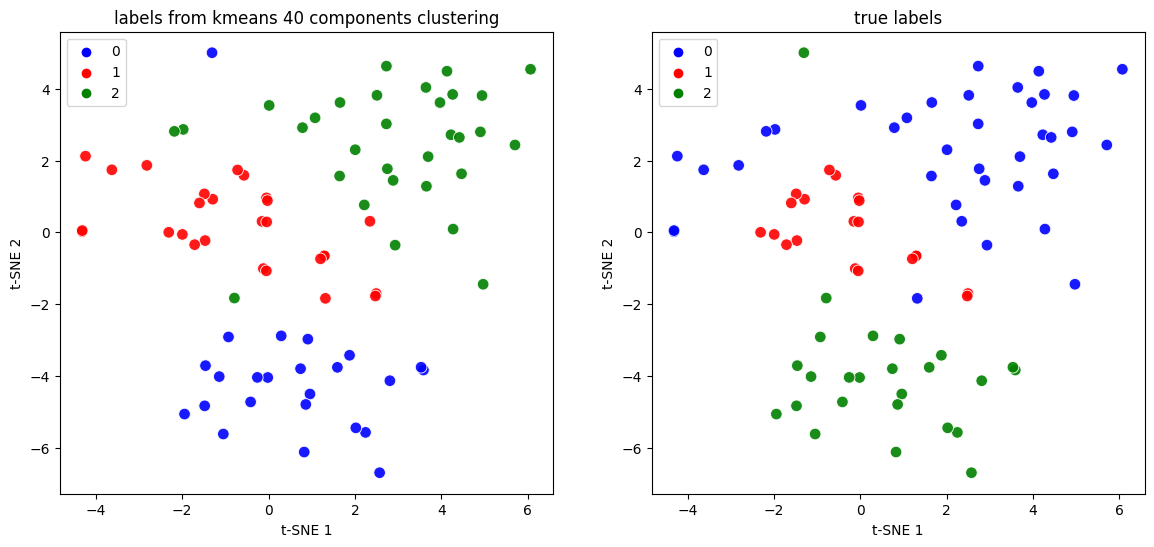

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


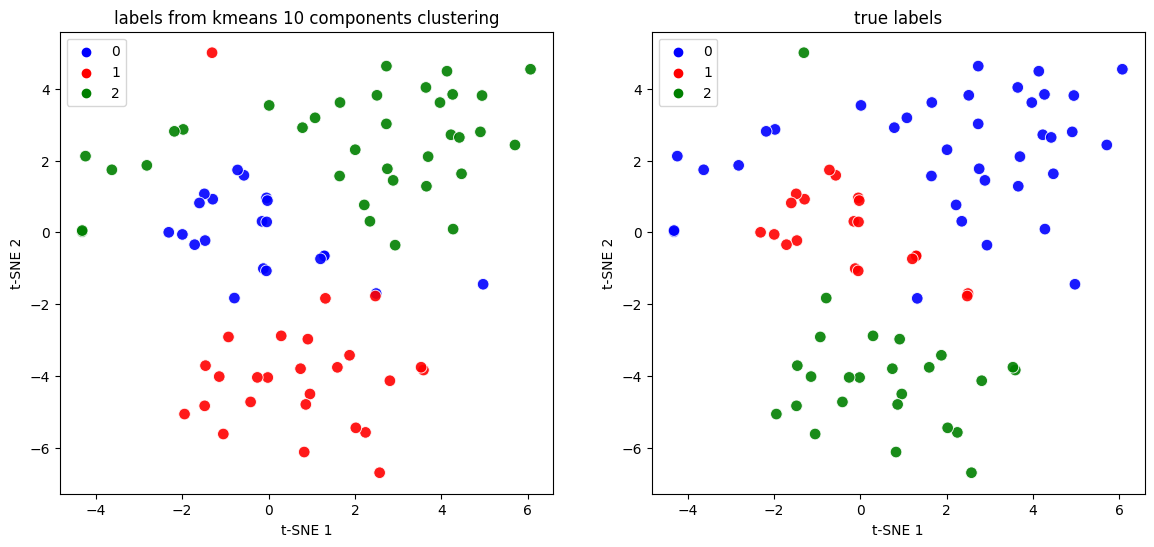

C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


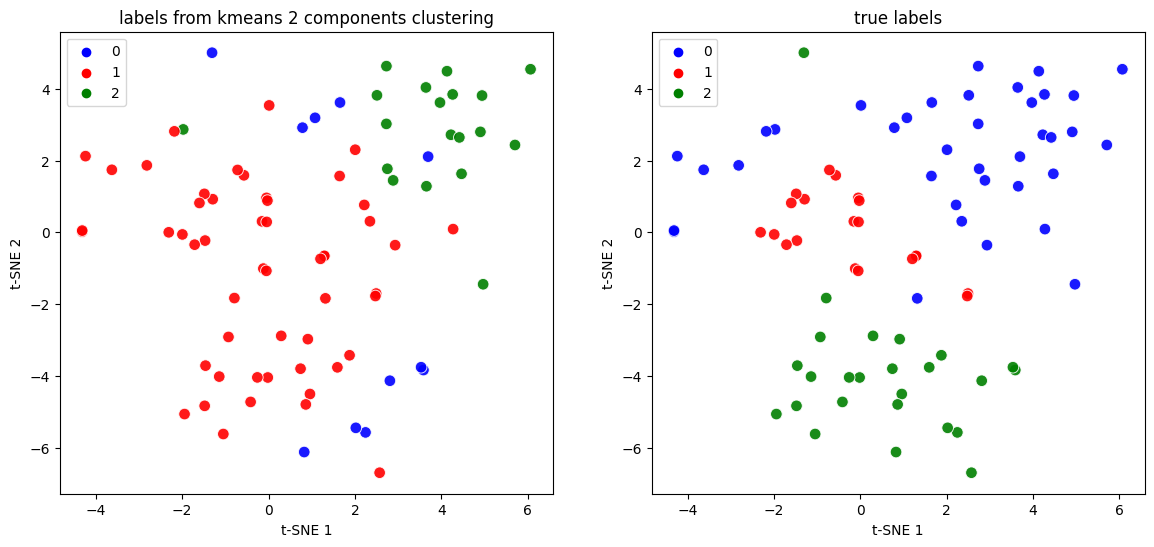

In [149]:
#generate kmeans visualisation for 4 different PCA levels

pca = PCA(n_components=70)
column_names_pca = ['PCA '+str(i) for i in range(1,70+1)]
pca_results = pd.DataFrame(pca.fit_transform(cancerDataSubset), columns=column_names_pca)

kmeans, kmeansfit = Kmeans(cancerDataSubset,3)

compare_results(kmeansfit,"kmeans 70 components")

pca = PCA(n_components=40)
column_names_pca = ['PCA '+str(i) for i in range(1,40+1)]
pca_results = pd.DataFrame(pca.fit_transform(cancerDataSubset), columns=column_names_pca)

kmeans, kmeansfit = Kmeans(cancerDataSubset,3)

compare_results(kmeansfit,"kmeans 40 components")

pca = PCA(n_components=10)
column_names_pca = ['PCA '+str(i) for i in range(1,10+1)]
pca_results = pd.DataFrame(pca.fit_transform(cancerDataSubset), columns=column_names_pca)

kmeans, kmeansfit = Kmeans(cancerDataSubset,3)

compare_results(kmeansfit,"kmeans 10 components")

pca = PCA(n_components=2)
column_names_pca = ['PCA '+str(i) for i in range(1,2+1)]
pca_results = pd.DataFrame(pca.fit_transform(cancerDataSubset), columns=column_names_pca)

kmeans, kmeansfit = Kmeans(cancerDataSubset,3)

compare_results(kmeansfit,"kmeans 2 components")



### Clustering method 3) - Spectral Clustering

c:\Users\Jesper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Jesper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:430: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:6: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.scatterplot(
C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\4001694451.py:20: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.scatterplot(


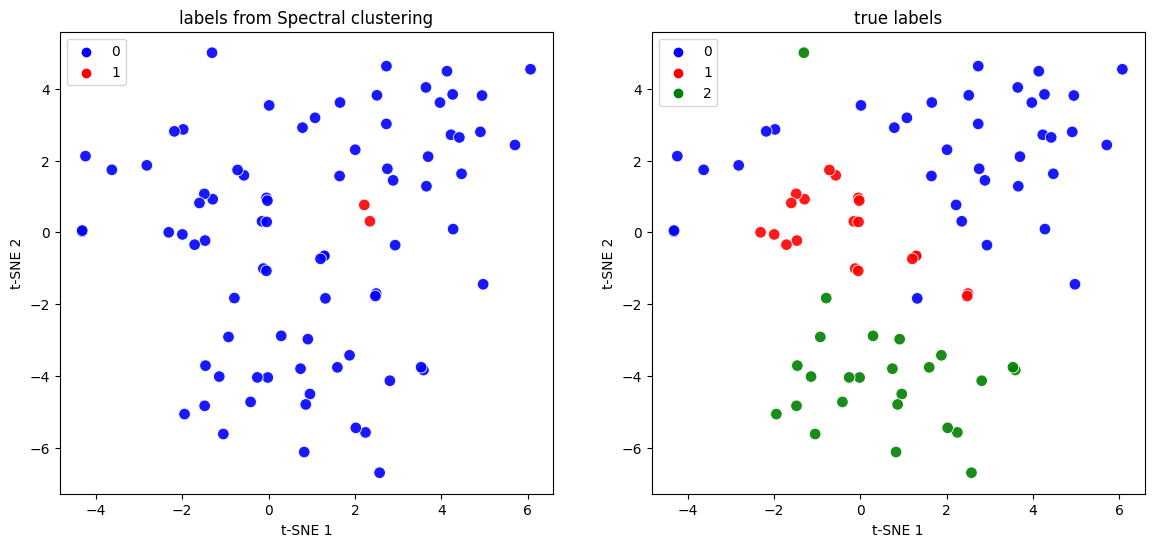

In [150]:

from sklearn.cluster import SpectralClustering
def SpectralClust(cancerDataSubset2,tsne_results,numberOfClusters):
  scData = SpectralClustering(n_clusters=numberOfClusters, gamma=1,n_neighbors=10).fit(cancerDataSubset2)
  scLabels = scData.labels_

  return scLabels, scData

scLabels1, scData = SpectralClust(cancerDataSubset,tsne_results,3)


compare_results(scLabels1,'Spectral')


# Question 2

#### Loading the RDATA file

In [151]:
# Loading the TCGA data
# Approximately 350 times bigger than the previous Cancerdata file

TCGA = pd.read_csv('./TCGAdata.txt', sep='\t')
TCGAlabels = pd.read_csv('./TCGAlabels', sep=' ') 

print(TCGA.shape)
print(TCGAlabels.shape)

(2887, 20530)
(2887, 1)


## PCA and T-SNE plot of data

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2887 samples in 0.614s...
[t-SNE] Computed neighbors for 2887 samples in 2.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2887
[t-SNE] Computed conditional probabilities for sample 2000 / 2887
[t-SNE] Computed conditional probabilities for sample 2887 / 2887
[t-SNE] Mean sigma: 46.699372
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.012684
[t-SNE] KL divergence after 300 iterations: 1.700964


<AxesSubplot: xlabel='t-SNE 1', ylabel='t-SNE 2'>

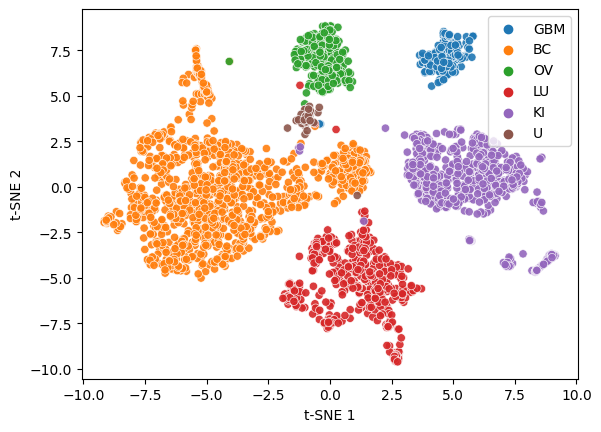

In [169]:
# NY PLOT AV FULLSTÄNDIG DATA
n_tsne_components = 2
tsne = TSNE(n_components=n_tsne_components, verbose=1, perplexity=40, n_iter=300)
column_names_tsne = ['t-SNE '+str(i) for i in range(1,n_tsne_components+1)]
tsne_results_complete = pd.DataFrame(tsne.fit_transform(TCGA), columns=column_names_tsne)

from matplotlib.colors import to_hex
colors = ['blue', 'red', 'green', 'orange', 'purple',
          'brown', 'black', 'magenta', 'cyan']
colors_hex = [to_hex(i) for i in colors]
color_palette = sns.color_palette(colors_hex)

# plt.scatter(tsne_results['t-SNE 1'],tsne_results['t-SNE 2'],c=TCGAlabels)

sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue=np.squeeze(TCGAlabels.values),
    data=tsne_results_complete,
    legend="full",
    alpha=0.9
)

In [170]:
labeledDataset = pd.concat([TCGA,TCGAlabels],axis=1)
uniqueLabels = pd.DataFrame(["GBM",'BC','OV','LU','KI','U'])

columnNames = [f"{x}" for x in range(TCGA.shape[1])]
columnNames.append("Labels")

labeledDataset.columns = columnNames #Assign Column Names

labeledDataset.groupby(["Labels"]).size()

num_samples = labeledDataset.shape[0]
print("Number of genes: ", TCGA.shape[1])
print("Number of samples: ", num_samples)
print("Number of labels: ", len(uniqueLabels))

Number of genes:  20530
Number of samples:  2887
Number of labels:  6


In [171]:
completeDataset = pd.DataFrame(labeledDataset)

## Ranges for dropping the specified indices. Quite ugly.
#Drop BC = 172:1172
#Drop LU = (172+1215+266):(172+1215+266+300)
#Drop KI = (172+1215+266+571):(172+1215+266+571+400)

indexToDrop = pd.Series([*range(172,1172),*range((172+1215+266),(172+1215+266+300)),*range((172+1215+266+571),(172+1215+266+571+400))])
incompleteDataset = completeDataset.drop(index=indexToDrop)
incompleteLabels = TCGAlabels.drop(index=indexToDrop)

incompleteDataset.groupby(["Labels"]).size()


## This part drops Labels and Nan values, so that it's plottable
print(incompleteDataset.isnull().values.any())
print(incompleteDataset.shape)
incompleteDataset = incompleteDataset.drop(columns="Labels")
incompleteDataset = incompleteDataset.dropna()

False
(1187, 20531)
(1187, 20530)
False


In [185]:
print("Counts of each label: ", np.unique(incompleteLabels, return_counts=True)[1])
print(incompleteDataset.shape)

Counts of each label:  [216 171 207 271 265  57]
(1187, 20530)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1187 samples in 0.290s...
[t-SNE] Computed neighbors for 1187 samples in 0.814s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1187
[t-SNE] Computed conditional probabilities for sample 1187 / 1187
[t-SNE] Mean sigma: 56.543737
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.091648
[t-SNE] KL divergence after 300 iterations: 1.004908


<AxesSubplot: xlabel='t-SNE 1', ylabel='t-SNE 2'>

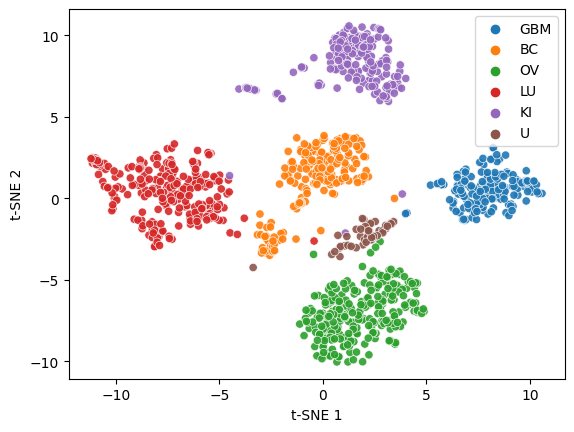

In [189]:
# generate t-SNE of the incomplete dataset
n_tsne_components = 2
tsne = TSNE(n_components=n_tsne_components, verbose=1, perplexity=40, n_iter=300)
column_names_tsne = ['t-SNE '+str(i) for i in range(1,n_tsne_components+1)]
tsne_results_incomplete = pd.DataFrame(tsne.fit_transform(incompleteDataset), columns=column_names_tsne)

sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue=np.squeeze(incompleteLabels.values),
    data=tsne_results_incomplete,
    legend="full",
    alpha=0.9
)

### Define plotting functions

In [173]:
# Define function to compare clustering results with the true labels
def compare_results(tsne_results, true_labels, cluster_labels, method_name:str):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("labels from "+method_name+" clustering")
    
    plt.subplot(1,2,2)
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=np.squeeze(true_labels),
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("true labels")
    
    plt.show()

# define function to plot and save only the clustering results, for presentation
def plot_clustering_results(tsne_results, cluster_labels, method_name:str):
    plt.figure(figsize=(7,6))
    
    sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=color_palette,
        data=tsne_results,
        s=70,
        legend="full",
        alpha=0.9
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("labels from "+method_name+" clustering")
    
    plt.show()

### DBSCAN

In [174]:
def generate_DBSCAN_clusters(dataset, pca_level):

    n_pca_components = pca_level
    pca_DBSCAN = PCA(n_components=n_pca_components)
    column_names_pca = ['PCA '+str(i) for i in range(1,n_pca_components+1)]

    pca_results_DBSCAN = pca_DBSCAN.fit_transform(dataset)

    min_samples = int(np.sqrt(pca_level))
        
    print("min_samples:", min_samples)

    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(pca_results_DBSCAN)
    neigh_dist, _ = neigh.kneighbors(n_neighbors=min_samples, return_distance=True)
    eps = np.max(neigh_dist[:,-1])/2 # SAVED

    if min_samples == 3:
        print(f"Max distance to {min_samples}rd nearest neighbor (eps): {eps:.2f}")
    else:
        print(f"Max distance to {min_samples}th nearest neighbor (eps): {eps:.2f}")

    DB_pca_cluster = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_results_DBSCAN)
    cluster_labels = DB_pca_cluster.labels_
    
    return cluster_labels

#### Explore DBSCAN parameters

PCA level: 100
Number of samples: 2887
min_samples: 10
Max distance to 10th nearest neighbor (eps): 122.76
Contains noise: True
Number of noise observations: 157
Number of cluster_labels: 7


C:\Users\Jesper\AppData\Local\Temp\ipykernel_2900\3089826364.py:52: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax2 = sns.scatterplot(


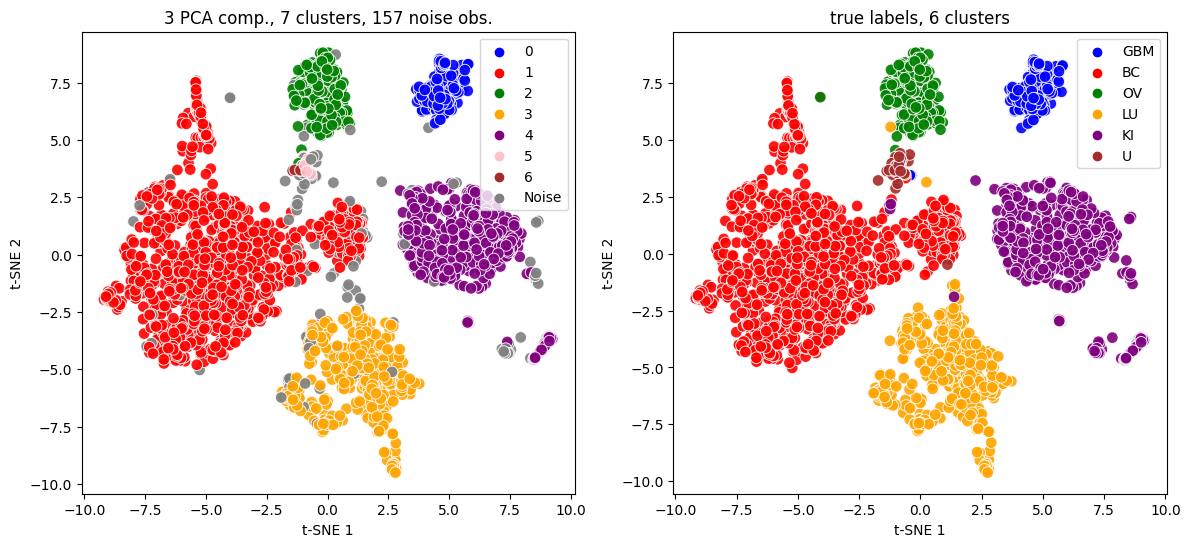

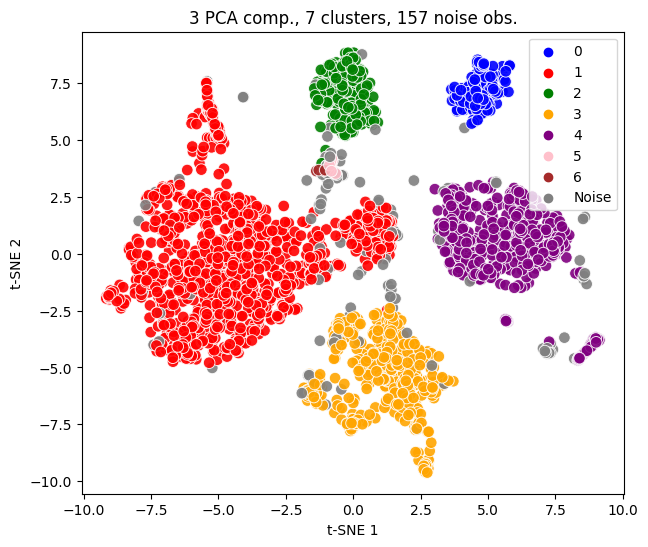

In [178]:
pca_level = 100
print("PCA level:", pca_level)
print("Number of samples:", num_samples)
cluster_labels = generate_DBSCAN_clusters(TCGA, pca_level=pca_level)

contains_noise = any(cluster_labels==-1)
if contains_noise:
    cluster_labels[cluster_labels==-1] = 50 # Make outliers a separate cluster

print(f"Contains noise: {contains_noise}")
num_noise = np.sum(cluster_labels==50)
print(f"Number of noise observations: {num_noise}")

colors_all = ['blue', 'red', 'green', 'orange', 'purple',
          'pink', 'brown', 'black', 'magenta', 'cyan']

num_clusters = len(np.unique(cluster_labels))-1
print("Number of cluster_labels:", num_clusters)
colors = colors_all[:max(len(np.unique(cluster_labels))-1,
                         np.unique(TCGAlabels).shape[0])] # Make sure we have enough colors
if contains_noise:
    colors.append('grey')  

colors_hex = [to_hex(i) for i in colors]

if num_clusters < 3:
    colors_hex = colors_hex[:num_clusters]
    colors_hex.append(to_hex('grey'))

fig = plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=cluster_labels,
    palette=colors_hex,
    data=tsne_results,
    s=70,
    legend="full",
    alpha=0.9
)
plt.title(f"{n_pca_components} PCA comp., {num_clusters} clusters, {num_noise} noise obs.")
handles, _ = ax1.get_legend_handles_labels()

labels = [str(i) for i in np.unique(cluster_labels)]
if contains_noise:
    labels[labels.index('50')] = 'Noise'
    
ax1.legend(handles, labels, loc='best')

plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=np.squeeze(TCGAlabels.values),
    palette=color_palette,
    data=tsne_results_complete,
    s=70,
    legend="full",
    alpha=0.9
)

handles, labels =  ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='best')
plt.title(f"true labels, {len(uniqueLabels)} clusters" )
plt.show()

# plot only clustering results
plt.figure(figsize=(7,6))

ax = sns.scatterplot(
        x='t-SNE 1', y='t-SNE 2',
        hue=cluster_labels,
        palette=colors_hex,
        data=tsne_results_complete,
        s=70,
        legend="full",
        alpha=0.9
    )
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"{n_pca_components} PCA comp., {num_clusters} clusters, {num_noise} noise obs.")

handles, _ = ax.get_legend_handles_labels()

labels = [str(i) for i in np.unique(cluster_labels)]
if contains_noise:
    labels[labels.index('50')] = 'Noise'

ax.legend(handles, labels, loc='best')

plt.savefig("./DBSCAN_clustering.png", dpi=300)
plt.show()

#### Automatically generate subplot of all PCA levels

In [176]:
def generate_DBSCAN_results(pca_levels):
    cluster_labels_list = []
    for level in pca_levels:
        cluster_labels = generate_DBSCAN_clusters(pca_level=level)
        
        cluster_labels_list.append(cluster_labels)
        
    return cluster_labels_list

pca_levels = [3, 10, 15, 25, 40, 50, 70]
cluster_labels_list = generate_DBSCAN_results(pca_levels)
    
def generate_DBSCAN_plots(tsne_results, true_labels, pca_levels, cluster_labels_list):
    
    plt.figure(figsize=(22,11))
    for j in range(len(pca_levels)+1):
        plt.subplot(2, 4, j+1)
        if j == 0:
            ax = sns.scatterplot(
                x="t-SNE 1", y="t-SNE 2",
                hue=np.squeeze(true_labels),
                palette=color_palette,
                data=tsne_results,
                s=70,
                legend="full",
                alpha=0.9
            )
            plt.title("true labels")
            plt.legend(loc='upper left')
        else:
            print(f"Number of PCA components: {pca_levels[j-1]}")
            cluster_labels = cluster_labels_list[j-1]
            
            contains_noise = any(cluster_labels==-1)
            if contains_noise:
                cluster_labels[cluster_labels==-1] = 50 # Make outliers a separate cluster

            num_noise = np.sum(cluster_labels==50)
            print(f"Number of noise observations: {num_noise}")

            colors_all = ['blue', 'red', 'green', 'orange', 'purple',
                    'pink', 'brown', 'black', 'magenta', 'cyan']

            num_clusters = len(np.unique(cluster_labels))-1
            print("Number of cluster_labels:", num_clusters)
            colors = colors_all[:max(len(np.unique(cluster_labels))-1, np.unique(cancerLabels).shape[0])] # Make sure we have enough colors
            if contains_noise:
                colors.append('grey')  

            colors_hex = [to_hex(i) for i in colors]
            
            plt.subplot(2, 4, j+1)
            
            ax = sns.scatterplot(
                x='t-SNE 1', y='t-SNE 2',
                hue=cluster_labels,
                palette=colors_hex,
                data=tsne_results,
                s=70,
                legend="full",
                alpha=0.9
            )
            plt.xlabel("")
            plt.ylabel("")
            plt.title(f"{n_pca_components} PCA comp., {num_clusters} clusters, {num_noise} noise obs.")

            if j == 1:
                handles, _ = ax.get_legend_handles_labels()

                labels = [str(i) for i in np.unique(cluster_labels)]
                if contains_noise:
                    labels[labels.index('50')] = 'Noise'

                ax.legend(handles, labels, loc='best')
            else:
                ax.get_legend().remove()

    plt.show()
    
generate_DBSCAN_plots(pca_levels, cluster_labels_list)
    

TypeError: generate_DBSCAN_clusters() missing 1 required positional argument: 'dataset'